<a href="https://colab.research.google.com/github/jhonatanwsds/TelecomX_BR_Modelagem/blob/main/TelecomX_BR_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ Preparação dos Dados

Remoção de Colunas Irrelevantes

In [1]:
import pandas as pd

url_dados =  'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR_Modelagem/refs/heads/main/dados_clientes_tratados.csv'

try:
      df = pd.read_csv(url_dados)
      print("Sucesso! O DataFrame 'df' foi criado a partir do link do GitHub.")

      display(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao tentar carregar os dados: {e}")
    print("Verifique se a URL está correta e é o link para o arquivo 'Raw'.")

Sucesso! O DataFrame 'df' foi criado a partir do link do GitHub.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [2]:
# --- Iniciando o Processo de analise de dados ---
print("--- Análise Inicial do Arquivo Carregado ---")
print("\nInformações do DataFrame (info):")
df.info()

print("\nPrévia dos dados com a coluna 'customerID' (head):")
print(df.head())

# --- Executando a Tarefa: Remover a Coluna de ID ---
coluna_para_remover = 'customerID'

print(f"\n--- Executando a Tarefa: Removendo a coluna '{coluna_para_remover}' ---")

if coluna_para_remover in df.columns:
    df.drop(columns=[coluna_para_remover], inplace=True)
    print(f"✅ Sucesso! A coluna '{coluna_para_remover}' foi removida.")
else:
    print(f"⚠️ Aviso: A coluna '{coluna_para_remover}' não foi encontrada. Talvez já tenha sido removida.")

# --- Verificação Final ---
print("\nColunas restantes no DataFrame:")
print(df.columns.to_list())

print("\nPrévia dos dados SEM a coluna 'customerID' (head):")
print(df.head())

--- Análise Inicial do Arquivo Carregado ---

Informações do DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingM

Encoding

In [3]:
# --- Próxima Etapa: Converter colunas de texto (categóricas) para formato numérico ---

print("--- Iniciando a Etapa de Encoding ---")

# Identificar as colunas que são do tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(f"Colunas categóricas identificadas para encoding: {colunas_categoricas.to_list()}")


df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

print("\n✅ Sucesso! O encoding foi aplicado.")

# --- Verificação Final ---
print("\n--- Verificação Pós-Encoding ---")
print("Informações do DataFrame após o encoding (note que agora todas as colunas são numéricas):")
df_encoded.info()

print("\nPrévia do DataFrame transformado (note as novas colunas e a ausência de texto):")
pd.set_option('display.max_columns', None)
print(df_encoded.head())

df_encoded.to_csv('dados_prontos_para_modelagem.csv', index=False)
print("\n💾 O DataFrame final, pronto para a modelagem, foi salvo como 'dados_prontos_para_modelagem.csv'.")

--- Iniciando a Etapa de Encoding ---
Colunas categóricas identificadas para encoding: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

✅ Sucesso! O encoding foi aplicado.

--- Verificação Pós-Encoding ---
Informações do DataFrame após o encoding (note que agora todas as colunas são numéricas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null 

Verificação da Proporção de Evasão

In [4]:
print("--- Análise de Desequilíbrio da Variável 'Churn' ---")

contagem_churn = df_encoded['Churn'].value_counts()
print("\nContagem de clientes:")
print(f"Não evadiram (0): {contagem_churn[0]}")
print(f"Evadiram (1):     {contagem_churn[1]}")


proporcao_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes (%):")
print(f"Não evadiram (0): {proporcao_churn[0]:.2f}%")
print(f"Evadiram (1):     {proporcao_churn[1]:.2f}%")


if abs(proporcao_churn[0] - proporcao_churn[1]) > 30:
    print("\n⚠️ Alerta: As classes estão significativamente desbalanceadas.")
    print("Isso pode exigir técnicas de reamostragem (como SMOTE) antes de treinar o modelo.")
else:
    print("\n✅ As classes possuem um equilíbrio razoável para iniciar a modelagem.")

--- Análise de Desequilíbrio da Variável 'Churn' ---

Contagem de clientes:
Não evadiram (0): 5163
Evadiram (1):     1869

Proporção de clientes (%):
Não evadiram (0): 73.42%
Evadiram (1):     26.58%

⚠️ Alerta: As classes estão significativamente desbalanceadas.
Isso pode exigir técnicas de reamostragem (como SMOTE) antes de treinar o modelo.


Balanceamento de Classes (opcional )

In [5]:
!pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import SMOTE
import pandas as pd


X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("--- Composição Original das Classes ---")
print(y.value_counts(normalize=True) * 100)
print("\n")


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("--- Composição das Classes Após o SMOTE ---")
print(y_resampled.value_counts(normalize=True) * 100)
print("\n")

print(f"Formato original de X: {X.shape}")
print(f"Formato de X após reamostragem: {X_resampled.shape}")

--- Composição Original das Classes ---
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


--- Composição das Classes Após o SMOTE ---
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


Formato original de X: (7032, 31)
Formato de X após reamostragem: (10326, 31)


Normalização ou Padronização (se necessário)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

print(f"Dados divididos em: {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste.")
print("-" * 50)

print("Iniciando a padronização dos dados...")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("✅ Dados de treino e teste padronizados com sucesso!")
print("-" * 50)


df_treino_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("Amostra dos dados de treino APÓS a padronização:")
display(df_treino_scaled.head())

Dados divididos em: 7228 amostras de treino e 3098 amostras de teste.
--------------------------------------------------
Iniciando a padronização dos dados...
✅ Dados de treino e teste padronizados com sucesso!
--------------------------------------------------
Amostra dos dados de treino APÓS a padronização:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,Contas_Diarias,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.397445,-0.782045,-0.526767,-0.984930,0.334664,-1.219185,-1.698794,-0.901031,-1.698794,0.857320,-0.334664,-0.970550,-1.082532,2.246895,2.246895,-0.6245,2.246895,-0.769917,2.246895,-0.778832,2.246895,-0.638002,2.246895,-0.896322,2.246895,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959
1,-0.397445,1.278699,-0.526767,1.815255,-2.988072,-1.219185,-0.350606,0.965736,-0.350606,-1.166426,2.988072,-0.970550,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,1.298841,-0.445059,1.283974,-0.445059,1.567393,-0.445059,1.115670,-0.445059,1.110685,-0.487081,2.172177,-0.524409,-0.972433,-0.554336
2,2.516074,-0.782045,-0.526767,-0.943136,0.334664,0.820220,0.743702,-0.717732,0.743702,0.857320,-0.334664,-0.970550,0.923760,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,-0.778832,-0.445059,-0.638002,-0.445059,1.115670,-0.445059,1.110685,-0.487081,-0.460368,-0.524409,1.028349,-0.554336
3,-0.397445,-0.782045,-0.526767,-1.110311,0.334664,0.820220,-0.839106,-0.916635,-0.839106,0.857320,-0.334664,-0.970550,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,-0.778832,-0.445059,-0.638002,-0.445059,-0.896322,-0.445059,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959
4,-0.397445,-0.782045,-0.526767,-1.110311,0.334664,-1.219185,-0.217538,-0.908489,-0.217538,0.857320,-0.334664,1.030344,-1.082532,-0.445059,-0.445059,-0.6245,-0.445059,-0.769917,-0.445059,1.283974,-0.445059,1.567393,-0.445059,-0.896322,-0.445059,-0.900345,-0.487081,-0.460368,-0.524409,-0.972433,1.803959


🎯 Correlação e Seleção de Variáveis

Análise de Correlação

Calculando a matriz de correlação...


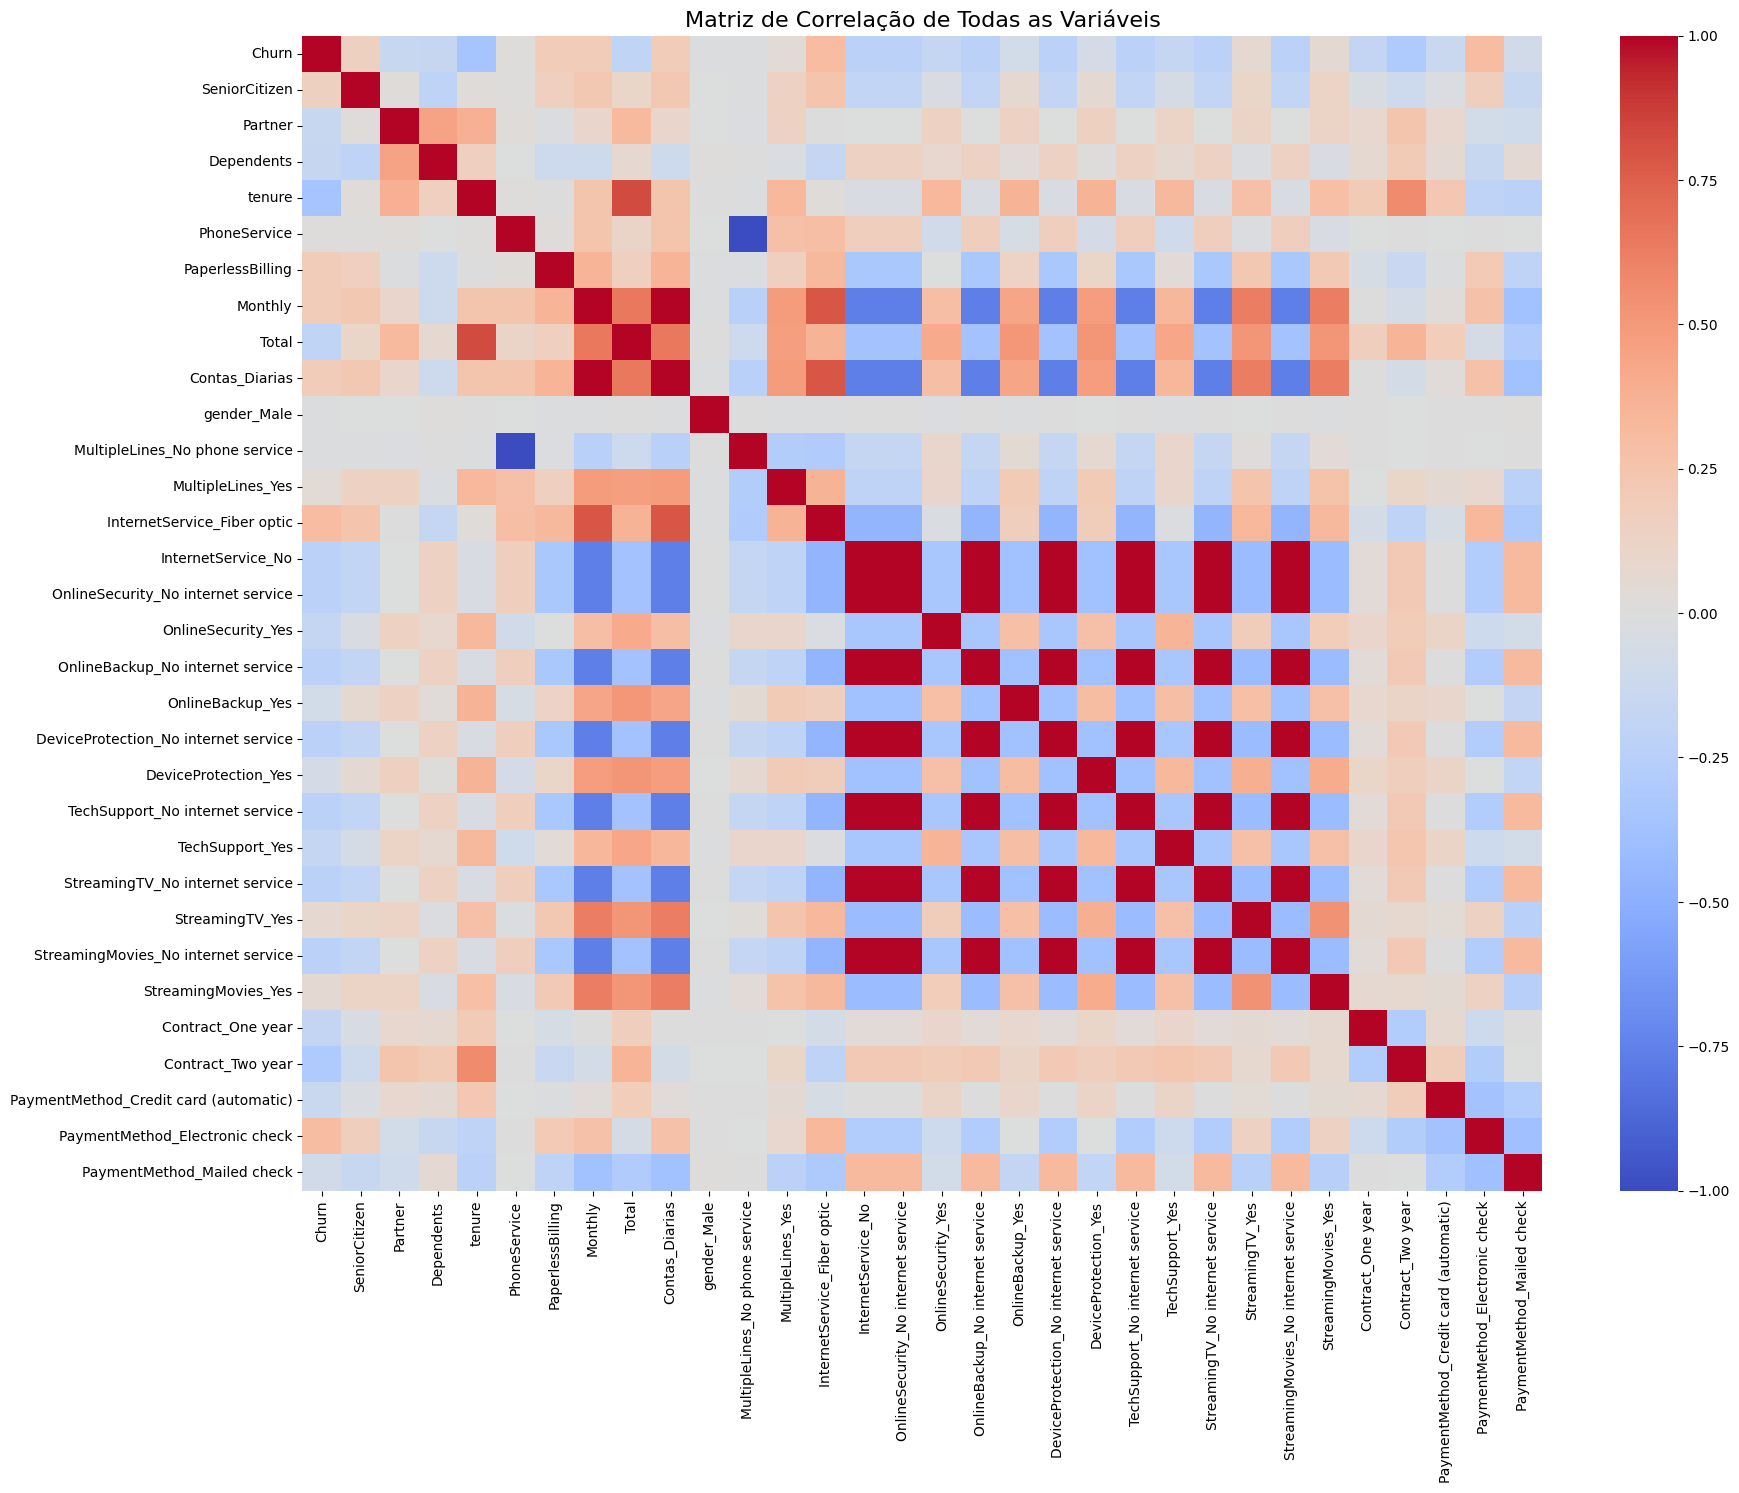

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Calculando a matriz de correlação...")
corr_matrix = df_encoded.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=16)
plt.show()